Nothing quantitative here, just taking a look at how the AAII setiment has been in new Spx 21 week rolling highs. The recent AAII setiment has turned siginificantly negative even as Spx is plowing up and wanted to see when has that happened in the past.

In [1]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

In [2]:
aaii = quandl.get("AAII/AAII_SENTIMENT", authtoken="YOUR KEY")
aaii.rename(columns={"S&P 500 Weekly High":"weekly_close"}, inplace=True)

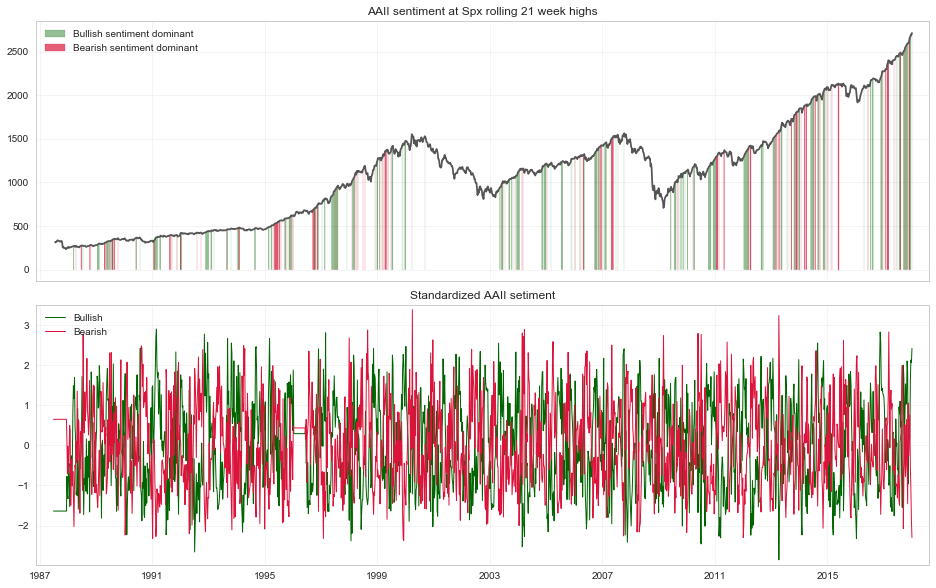

In [20]:
weekly_max = aaii["weekly_close"].rolling(21).max()

bull_mean = (aaii["Bullish"] - aaii["Bullish"].rolling(21).mean()) / aaii["Bullish"].rolling(21).std()
bear_mean = (aaii["Bearish"] - aaii["Bearish"].rolling(21).mean()) / aaii["Bearish"].rolling(21).std()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

ax1.set_title("AAII sentiment at Spx rolling 21 week highs")
ax1.plot(aaii["weekly_close"], color="#555555", label="_no_label_")

ax1.fill_between(aaii.index, 0, aaii["weekly_close"], where=((bull_mean>=0) & (weekly_max == aaii["weekly_close"])),
                        color="darkgreen", alpha=0.42, label="Bullish sentiment dominant")
ax1.fill_between(aaii.index, 0, aaii["weekly_close"], where=((bear_mean>=0) & (weekly_max == aaii["weekly_close"])),
                        color="crimson", alpha=0.69, label="Bearish sentiment dominant")
ax1.grid(alpha=0.21)
#ax1.set_yscale("log")
ax1.legend(loc="upper left")

ax2.set_title("Standardized AAII setiment")
ax2.plot(bull_mean.bfill(), linewidth=1, color="darkgreen", label="Bullish")
ax2.plot(bear_mean.bfill(), linewidth=1, color="crimson", label="Bearish")
ax2.grid(alpha=0.21)
ax2.legend(loc="upper left")
plt.margins(0.02)
fig.subplots_adjust(hspace=0.089)

Thanks your time and feel free to leave a comment